In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')

In [3]:
df.target.value_counts()

0    220
1     83
Name: target, dtype: int64

In [4]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

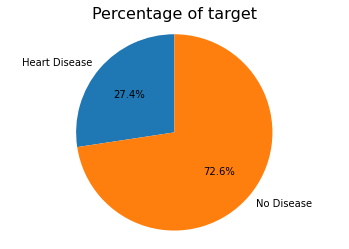

In [5]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [6]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [7]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [9]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


<ipython-input-9-7e0cb5034682>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('target',1)


In [10]:
y

0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)
#0

shape of X and y respectively (train) : (212, 13) (212,)
shape of X and y respectively (test) : (91, 13) (91,)


In [12]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8461538461538461
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.21978021978021978
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        67
           1       0.75      0.62      0.68        24

    accuracy                           0.85        91
   macro avg       0.81      0.78      0.79        91
weighted avg       0.84      0.85      0.84        91



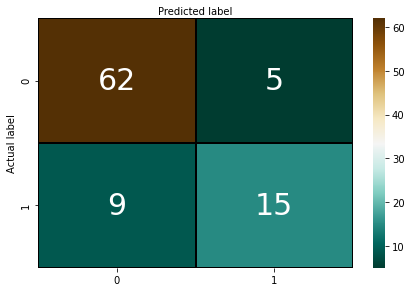

array([[62,  5],
       [ 9, 15]], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
confusion_matrix

In [14]:
TP=confusion_matrix[0][0]
TN=confusion_matrix[1][1]
FN=confusion_matrix[1][0]
FP=confusion_matrix[0][1]
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for Random Forest: 0.8461538461538461
Testing Sensitivity for Random Forest: 0.8732394366197183
Testing Specificity for Random Forest: 0.75
Testing Precision for Random Forest: 0.9253731343283582
